### Intorduction

This is  a practice session, where we will try to solve a "binary classification" supervised machine learning problem, specially focused on using decision tree calssifier algorithm. Some basic data preprocessing and machine learning application will be done, and the KPI of the model performance (like f1_score) will be checked. It is important to note, we will not use any other algorithm here, but it doesn't mean other algorithm might not give a better model performance.

#### Data Source

Data collected from: https://github.com/SKawsar/Machine_Learning_With_Python_Batch_2/blob/main/Churn.csv 

Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

Unfortunately, the actual meaning of the columns was not found, so the explation part of the dataset is excluded, we just try to have some understanding from the column/features name.

#### Importing libraries

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

Download the dataset.

In [385]:
df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Machine_Learning_With_Python_Batch_2/main/Churn.csv")
df.head(10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,...,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,...,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,...,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,...,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


Now check some information about the dataset to decide do we need any processing or not.

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

It is understable that there is no blank cell, 3333 entries and 21 features, out of these 5 are of object types, rest are either int or float type. Now, we will try to convert these object type features, before that, have a close look into those.

In [387]:
print(len(df["Churn"].unique()))
print(len(df["Intl_Plan"].unique()))
print(len(df["Vmail_Plan"].unique()))
print(len(df["State"].unique()))
print(len(df["Phone"].unique()))

2
2
2
51
3333


In [388]:
df.describe(include = "object")

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,382-4657
freq,2850,3010,2411,106,1


As we will consider "Churn" as the target variable, we are not concern about it, and 4 rest four features, "Intl_Plan" and "Vmail_Plan" have only two unique values each, but "State" and "Phone" have a considerable number of unique values. But for "Phone" colume, none of the value appears twice, means this is unique for every instance, we can exclude this feature from the dataset.

In [389]:
df = df.drop (["Phone"], axis = 1)

Now, for the columns "Churn", "Intl_Plan" & "Vmail_Plan", as we have only 2 unique values there, label encoding is ok for these 3 columns. First check what are the values here.

In [390]:
print(df["Churn"].value_counts())

print(df["Intl_Plan"].value_counts())

print(df["Vmail_Plan"].value_counts())

no     2850
yes     483
Name: Churn, dtype: int64
no     3010
yes     323
Name: Intl_Plan, dtype: int64
no     2411
yes     922
Name: Vmail_Plan, dtype: int64


Now change these existing values to numeric values.

In [391]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'yes' else 0)
df['Intl_Plan'] = df['Intl_Plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['Vmail_Plan'] = df['Vmail_Plan'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415


We manage to change 3 out of 4 remaining object type columns, now we will look into "State" column, as we see we have 51 unique entries there, and this is not of "ordinal" type of data, so One-hot encoding is better than label encoding, we will now change this column.

In [392]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We now manage to process most of the data in this data set. But before going into next process, look into one more column, "Area_Code".

In [393]:
print(len(df["Area_Code"].unique()))

print(df["Area_Code"].value_counts())

3
415    1655
510     840
408     838
Name: Area_Code, dtype: int64


Though this is numeric type, but this is kind of a identification number, so more of object type, lets change this also using One-hot encoding

In [394]:
df['Area_408'] = df['Area_Code'].apply(lambda x: 1 if x == 408 else 0)
df['Area_415'] = df['Area_Code'].apply(lambda x: 1 if x == 415 else 0)
df['Area_510'] = df['Area_Code'].apply(lambda x: 1 if x == 510 else 0)
df = df.drop(["Area_Code"], axis=1)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area_408,Area_415,Area_510
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Data transformation part is completed, now we will go into main part, training the model, but before that, we need to check few more things. There are too many features  in our dataset, normally it is a good practice to reduce the features excluding the features which are not "influencial" or the relationship is not clear with the target. In this step we will check which features are important and which are not.

In [395]:
corr = df.corr()
plt.figure(figsize=(256, 128))
correlation_matrix = df.corr(method="pearson")
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, square=True, cmap="RdYlGn", linecolor='white', mask=mask)

<AxesSubplot:>

Above figure showing the correlation among the features, due to color grading we can distinguish the important features (in this case, the cells of color red and green are of particular interest), but sometimes it might be useful to exclude the cells which are not important from the figure, it makes the figure more "neat", below we are trying to creat this kind of heatmap, where we will exclude the cells for which correlation inde is below 0.2.

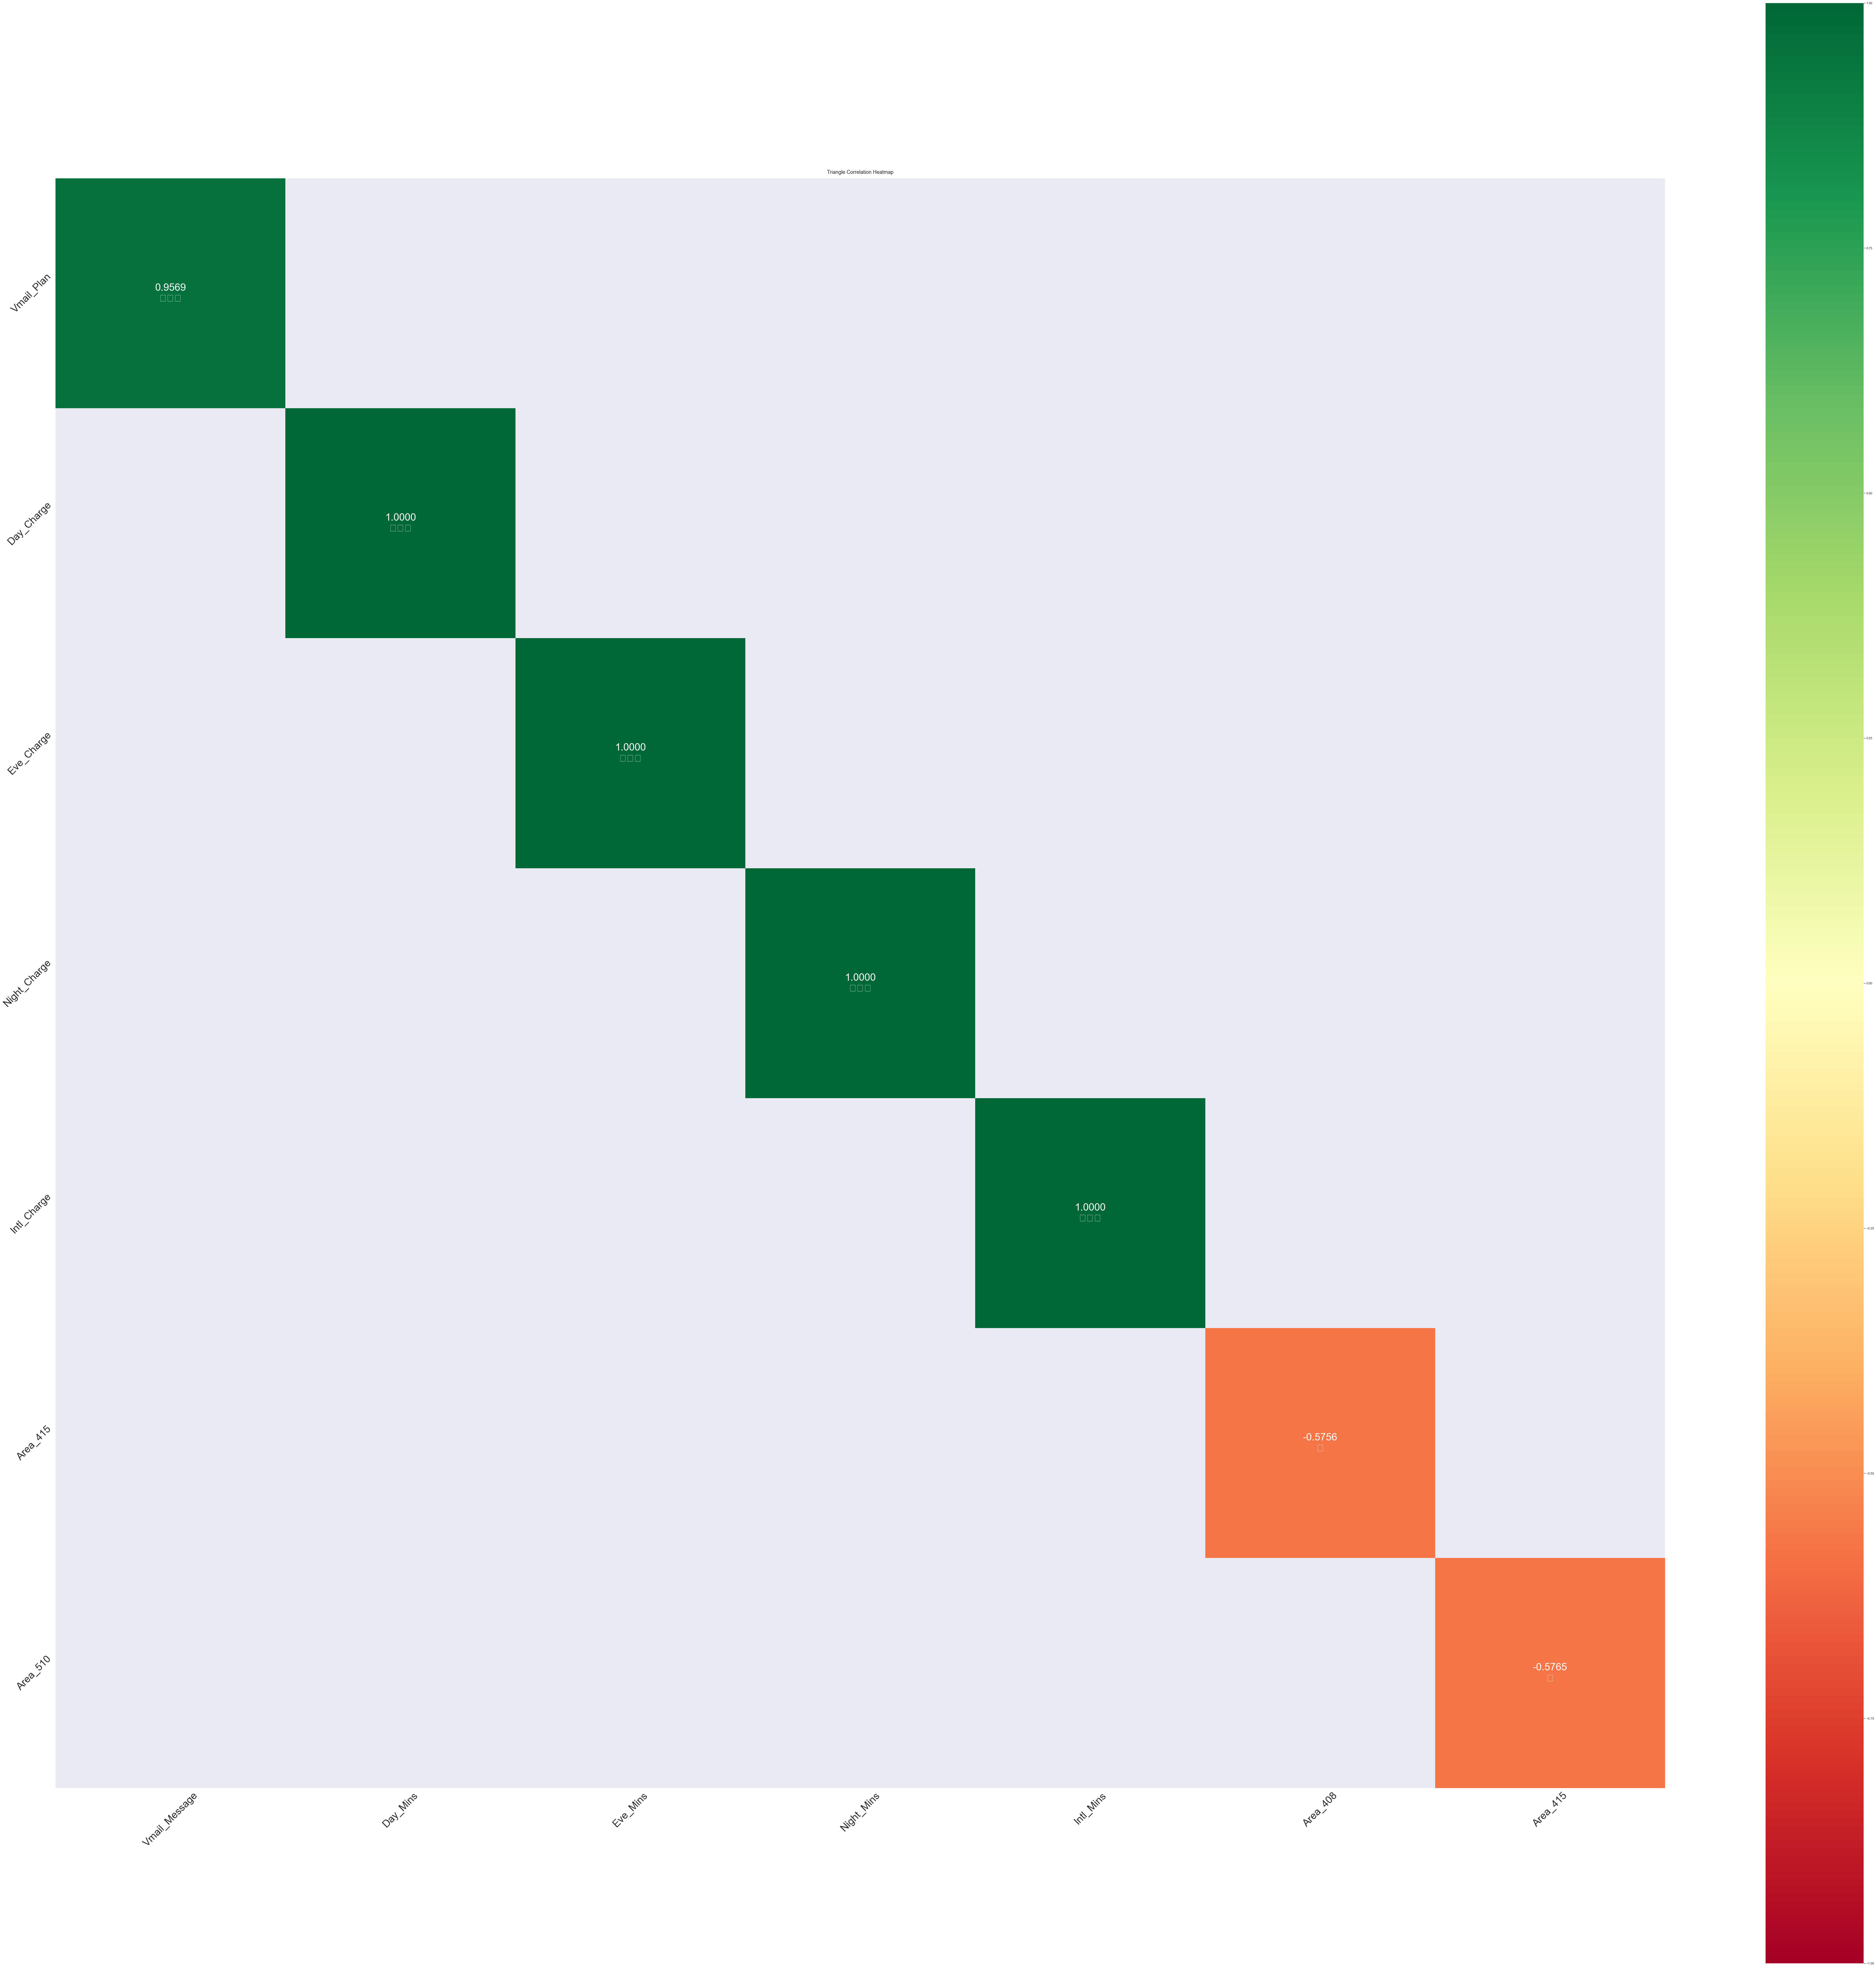

In [396]:
plt.figure(figsize=(128, 128))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.4  # only show cells with abs(correlation) at least this value
extreme_1 = 0.5  # show with a star
extreme_2 = 0.6  # show with a second star
extreme_3 = 0.75  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='RdYlGn', annot_kws = {"size": 36}, square=True)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 36, rotation = 45)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 36, rotation = 45)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

From above heatmap, we found which features are important, and interestingly there are only a few, so to improve the model (like reducing the chance of overfitting, improving the computing power), we will drop those are not important.

In [397]:
print(df.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Area_408', 'Area_415', 'Area_510'],
      dtype='objec

In [398]:
df = df.drop(['Account_Length', 'CustServ_Calls', 'Intl_Plan', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE','State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'], axis=1)
df.head()

,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,Churn,Vmail_Plan,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge,Area_408,Area_415,Area_510
0,25,265.1,197.4,244.7,10.0,0,1,45.07,16.78,11.01,2.70,0,1,0
1,26,161.6,195.5,254.4,13.7,0,1,27.47,16.62,11.45,3.70,0,1,0
2,0,243.4,121.2,162.6,12.2,0,0,41.38,10.30,7.32,3.29,0,1,0
3,0,299.4,61.9,196.9,6.6,0,0,50.90,5.26,8.86,1.78,1,0,0
4,0,166.7,148.3,186.9,10.1,0,0,28.34,12.61,8.41,2.73,0,1,0


In [399]:
print(df["Churn"].value_counts())

0    2850
1     483
Name: Churn, dtype: int64


If we look into the columns, the range of the values are large, and we will transform the data using MinMaxScaler or StandardScaler. Before chosing the method, check the theoritical aspects of these two methods.

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range of 0 to 1, else in the range of -1 to 1, if there are negative values in the dataset. It will preserve the shape of the dataset (no distortion). MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

important to mention, if there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed), but we are not going into this in this excercise.

As checking the data distribution is important to decide on the transformation method, check this first using histogram.

array([[<AxesSubplot:title={'center':'Vmail_Message'}>,
        <AxesSubplot:title={'center':'Day_Mins'}>,
        <AxesSubplot:title={'center':'Eve_Mins'}>,
        <AxesSubplot:title={'center':'Night_Mins'}>],
       [<AxesSubplot:title={'center':'Intl_Mins'}>,
        <AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Vmail_Plan'}>,
        <AxesSubplot:title={'center':'Day_Charge'}>],
       [<AxesSubplot:title={'center':'Eve_Charge'}>,
        <AxesSubplot:title={'center':'Night_Charge'}>,
        <AxesSubplot:title={'center':'Intl_Charge'}>,
        <AxesSubplot:title={'center':'Area_408'}>],
       [<AxesSubplot:title={'center':'Area_415'}>,
        <AxesSubplot:title={'center':'Area_510'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

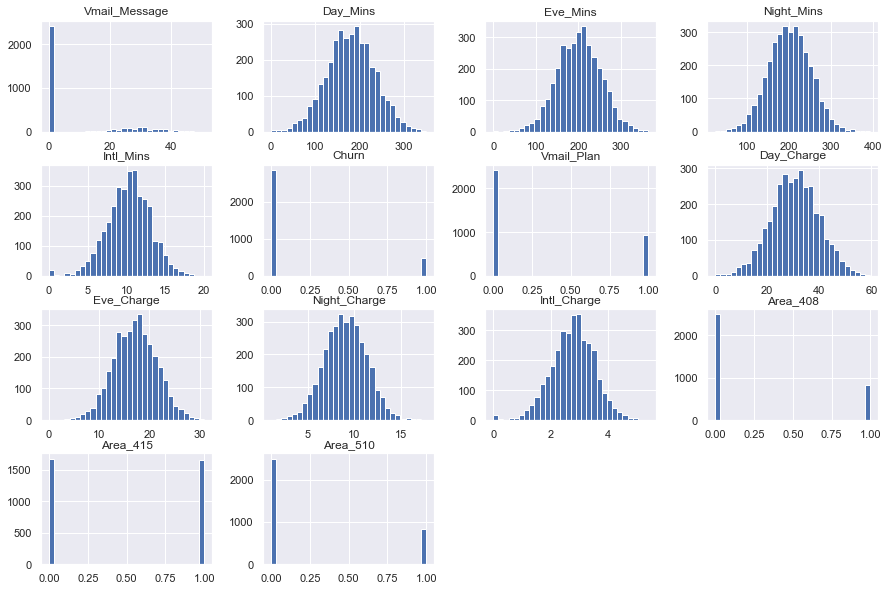

In [400]:
df.hist(bins=30, figsize=(15, 10))

Above figure shows, the columns which contains continuous variables are normally distributed, but there are few columns which has only "binary" values, and histogram is actually not appliable for this sort of data. But as our data set has some of these features, assumption is "MinMaxScaler" will work better than the "Standard Scaler", we will transform the data using both method and will look which one is the good fit.

In [401]:
# transform data with MinMaxScaler
df_scaled_MinMax = df.copy(deep=True)
df_scaled_MinMax[['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']] = MinMaxScaler().fit_transform(df_scaled_MinMax[['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']])


# transform data with StandardScaler
df_scaled_StandardScaler = df.copy(deep=True)
df_scaled_StandardScaler[['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']] = StandardScaler().fit_transform(df_scaled_StandardScaler[['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']])


After data transformation, now we will apply model, and in this practice our main focus is on "Decision Tree classifier" (as this is a classification problem), so we are only applying this though it is recommended to try different algorithm and choose the best one.

In [402]:
X_df = df.drop(["Churn"], axis=1)
y_df= df.Churn
X_df.head()

,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,Vmail_Plan,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge,Area_408,Area_415,Area_510
0,25,265.1,197.4,244.7,10.0,1,45.07,16.78,11.01,2.70,0,1,0
1,26,161.6,195.5,254.4,13.7,1,27.47,16.62,11.45,3.70,0,1,0
2,0,243.4,121.2,162.6,12.2,0,41.38,10.30,7.32,3.29,0,1,0
3,0,299.4,61.9,196.9,6.6,0,50.90,5.26,8.86,1.78,1,0,0
4,0,166.7,148.3,186.9,10.1,0,28.34,12.61,8.41,2.73,0,1,0


In [403]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=1)

In [404]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [405]:
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model.predict(X_test)))

Training accuracy... 1.0
Test accuracy 0.8350824587706147
F1 Score:  0.4554455445544554


Extremely overfitted model, not good. Now focus on reducing the overfitting. To do so, we will use a technique named  "GridSearchCV". But before that, check the complexity of the model graphically using "Tree-diagram".

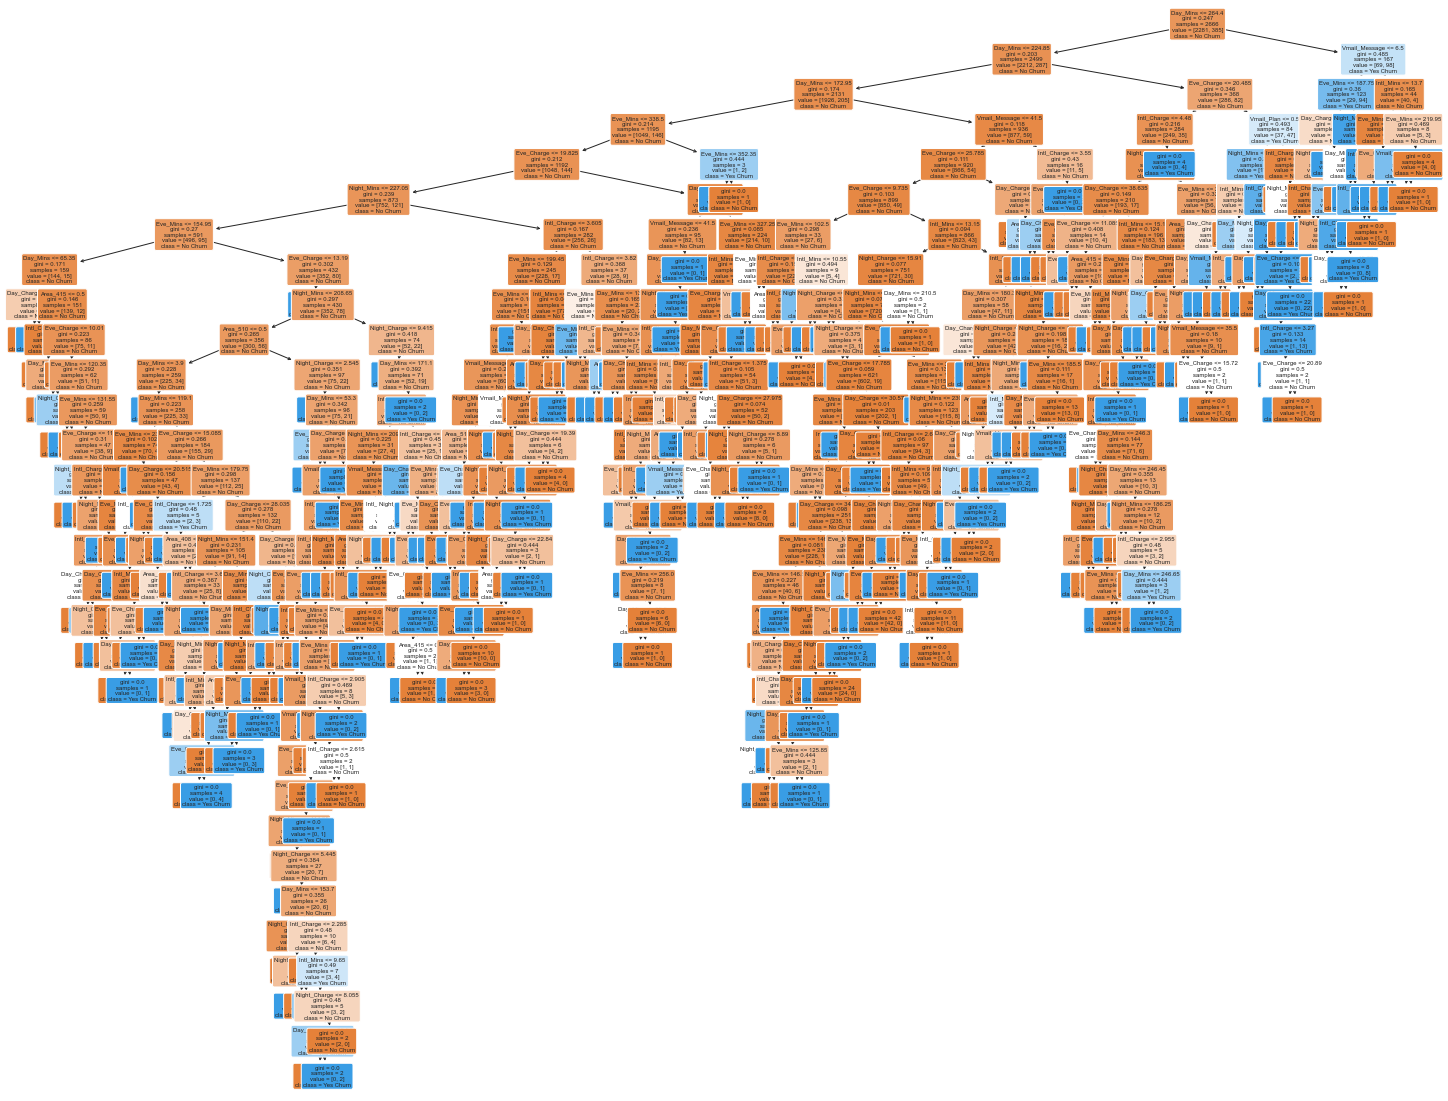

In [406]:
plt.figure(figsize = (25, 20))
plot_tree(model, 
           filled=True,
           rounded=True,
           class_names = ["No Churn", "Yes Churn"],
           feature_names = X_df.columns, fontsize=6)

plt.show()

Above picture in particular not readable, but our main interest was to see the complexity of the model, and we can see this is very complex. We now try to optimize the model using GridSearchCV, here we are mainly focusing on the "f1" score.

In [407]:
parameters = {'max_depth':[i for i in range(3, 9)], 
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2', None]}
model_optimized = GridSearchCV(model, param_grid = parameters, cv=10, verbose=2, scoring='f1')
model_optimized.fit(X_train, y_train)
print('Training accuracy...', accuracy_score(y_train, model_optimized.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_optimized.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_optimized.predict(X_test)))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max

If we compare the results before and after optimization, we will see Training accuracy is reduced after optimization, but this might be positive as it means "overfitting" reduced, and imporvement of test accuracy support this statement, but unfortunately the F1 score is not improved. While we set the range for maximum depth, we can play with it and try to see how it changes with the depth, but this is out of the scope of this practice excercise, so I am skipping it now, so we taking this result, and see what are the best parameters this techniques gives us.

In [408]:
model_optimized.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': None}

Now, we back to our "transformed dataset" and will try to see if the transformation gives us any better result.

First, checking model performance on the data transformed with MinMaxScaler

In [409]:
X_df_scaled_MinMax = df_scaled_MinMax.drop(["Churn"], axis=1)
y_df_scaled_MinMax= df_scaled_MinMax.Churn
X_df_scaled_MinMax.head()

,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,Vmail_Plan,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge,Area_408,Area_415,Area_510
0,25,0.755701,0.542755,0.595750,0.500,1,0.755701,0.542866,0.595935,0.500000,0,1,0
1,26,0.460661,0.537531,0.621840,0.685,1,0.460597,0.537690,0.622236,0.685185,0,1,0
2,0,0.693843,0.333242,0.374933,0.610,0,0.693830,0.333225,0.375374,0.609259,0,1,0
3,0,0.853478,0.170195,0.467187,0.330,0,0.853454,0.170171,0.467424,0.329630,1,0,0
4,0,0.475200,0.407754,0.440290,0.505,0,0.475184,0.407959,0.440526,0.505556,0,1,0


In [410]:
X_train_MinMax, X_test_MinMax, y_train_MinMax, y_test_MinMax = train_test_split(X_df_scaled_MinMax, y_df_scaled_MinMax, test_size=0.2, random_state=1)
model.fit(X_train_MinMax, y_train_MinMax)
print('Training accuracy...', accuracy_score(y_train_MinMax, model.predict(X_train_MinMax)))
print('Test accuracy', accuracy_score(y_test_MinMax, model.predict(X_test_MinMax)))
print("F1 Score: ",f1_score(y_test_MinMax, model.predict(X_test_MinMax)))

Training accuracy... 1.0
Test accuracy 0.8290854572713643
F1 Score:  0.45192307692307687


Now, checking model performance on the data transformed with StandardScaler

In [411]:
X_df_scaled_Standard = df_scaled_StandardScaler.drop(["Churn"], axis=1)
y_df_scaled_Standard= df_scaled_StandardScaler.Churn
X_df_scaled_Standard.head()

,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,Vmail_Plan,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge,Area_408,Area_415,Area_510
0,25,1.566767,-0.070610,0.866743,-0.085008,1,1.567036,-0.070427,0.866029,-0.085690,0,1,0
1,26,-0.333738,-0.108080,1.058571,1.240482,1,-0.334013,-0.107549,1.059390,1.241169,0,1,0
2,0,1.168304,-1.573383,-0.756869,0.703121,0,1.168464,-1.573900,-0.755571,0.697156,0,1,0
3,0,2.196596,-2.742865,-0.078551,-1.303026,0,2.196759,-2.743268,-0.078806,-1.306401,1,0,0
4,0,-0.240090,-1.038932,-0.276311,-0.049184,0,-0.240041,-1.037939,-0.276562,-0.045885,0,1,0


In [412]:
X_train_Standard, X_test_Standard, y_train_Standard, y_test_Standard = train_test_split(X_df_scaled_Standard, y_df_scaled_Standard, test_size=0.2, random_state=1)
model.fit(X_train_Standard, y_train_Standard)
print('Training accuracy...', accuracy_score(y_train_Standard, model.predict(X_train_Standard)))
print('Test accuracy', accuracy_score(y_test_Standard, model.predict(X_test_Standard)))
print("F1 Score: ",f1_score(y_test, model.predict(X_test_Standard)))

Training accuracy... 1.0
Test accuracy 0.8350824587706147
F1 Score:  0.46601941747572817


We can see, actually the StandardScaler method in this case gives us a better result, though not significant,so our previous assumption was wrong.

Now, wewill try to find the best parameters for data transformed with standard scaler.

In [413]:
parameters = {'max_depth':[i for i in range(3, 9)], 
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2', None]}
model_optimized = GridSearchCV(model, param_grid = parameters, cv=10, verbose=2, scoring='f1')
model_optimized.fit(X_train_Standard, y_train_Standard)
print('Training accuracy...', accuracy_score(y_train_Standard, model_optimized.predict(X_train_Standard)))
print('Test accuracy', accuracy_score(y_test_Standard, model_optimized.predict(X_test_Standard)))
print("F1 Score: ",f1_score(y_test_Standard, model_optimized.predict(X_test_Standard)))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max

The improvement in this case is significant, so we see standardscaler tranformation and parameter tuning gives us a better result.

But, actually there are some points need to be discussed. While we talked about the "suitablity" of the transformation technique, our discussion was confined only to the data type, we  did not consider the machine learning algorithm type there. Theoritically speaking, tree-based model applied in  "calssification" type problem doesn't need data standarization, but if it is a "regression" problem, then it might give a better result (source: https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf). If we want to discuss "why" it is so, it requires a closer look to the approach each algorithm takes to solve any problem, which is very time consuming. But, scaling the data might result more robust relationship, so usually there is no harm in doing that, so whenever we are in confusion, better scale the data.

So far, this is our model, now we will check some "KPI" of these model performance, like Confusion Matrix, Classification report, and ROC-AUC.



In [419]:
y_pred = model_optimized.predict(X_test_Standard)
confusion_matrix_dt = confusion_matrix(y_test_Standard, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

confusion_matrix: 
 [[561   8]
 [ 61  37]]


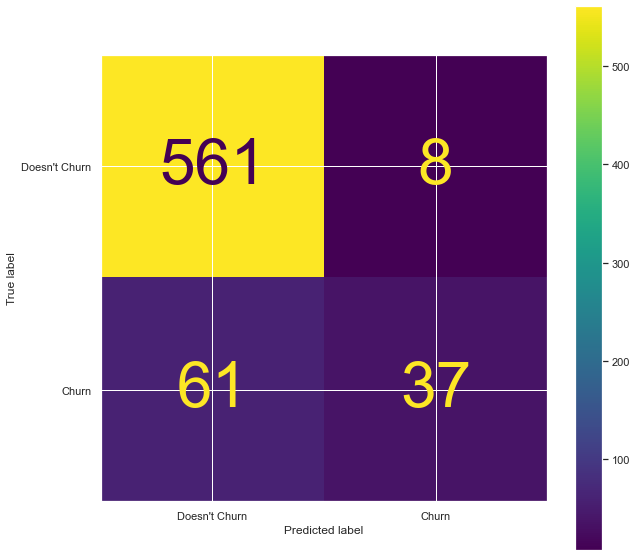

In [431]:
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels=["Doesn't Churn", "Churn"])
fig, ax = plt.subplots(figsize=(10,10))
display_confusion_matrix.plot(ax=ax)

plt.show()

In [440]:
print(classification_report(y_test_Standard, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       569
           1       0.82      0.38      0.52        98

    accuracy                           0.90       667
   macro avg       0.86      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667



Above we printed our calssification report, now we will explain the different term of the reports in this section briefly.

Accuracy: the simplest measure, it is the ratio of ratio of correct predictions to the total number of predictions.

Accuracy = Correct prediction / (Correct prediction + Incorrect prediction), or,
            (True positive + True Negative) / (True Positive + False Positive + False Negative + True Negative)
            
Recall: the ratio of predicted positives to the total number of positive labels.

Recall = True positive / Total number of positive label, or, 
        True Positive / (True positive + False Negative)

Precision: the ratio of the correct positive predictions to the total number of positive predictions.

Precision = True positive / Total number of positive predictions, or, 
        True Positive / (True positive + False positive)

f1_score = the harmonic mean of both the values, depends both on precision and recall, and many times the most important index used to evaluate a  model performance.

f1_score = (2 * Recall * Precision) / (Recall + Precision)

support: the number of actual occurrences of the class in the dataset, the imbalance of which indicates structural weaknesses in the reported scores.

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max

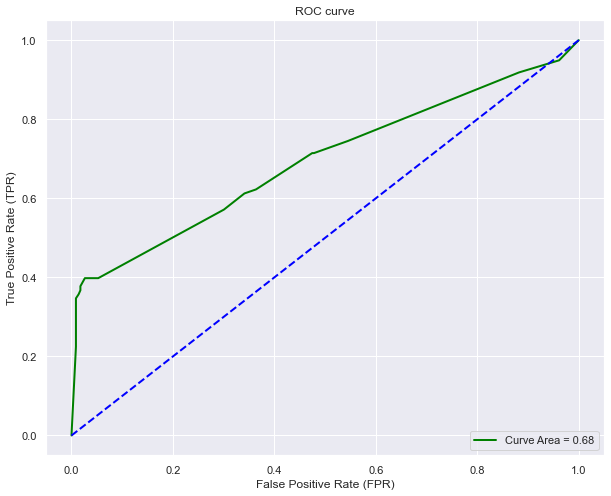

In [441]:
fpr, tpr, thr = roc_curve(y_test_Standard, model_optimized.fit(X_train_Standard, y_train_Standard).predict_proba(X_test_Standard)[:,1])
auc = np.round(roc_auc_score(y_test_Standard, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

And this is the end of our practice session.